# Business Problem

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ratings=pd.read_csv("zee-ratings.dat",delimiter="\t")
ratings

,UserID::MovieID::Rating::Timestamp
0,1::1193::5::978300760
1,1::661::3::978302109
2,1::914::3::978301968
3,1::3408::4::978300275
4,1::2355::5::978824291
...,...
1000204,6040::1091::1::956716541
1000205,6040::1094::5::956704887
1000206,6040::562::5::956704746
1000207,6040::1096::4::956715648


In [4]:
movies = pd.read_csv("zee-movies.dat", delimiter="\t", encoding="ISO-8859-1")
movies

,Movie ID::Title::Genres
0,1::Toy Story (1995)::Animation|Children's|Comedy
1,2::Jumanji (1995)::Adventure|Children's|Fantasy
2,3::Grumpier Old Men (1995)::Comedy|Romance
3,4::Waiting to Exhale (1995)::Comedy|Drama
4,5::Father of the Bride Part II (1995)::Comedy
...,...
3878,3948::Meet the Parents (2000)::Comedy
3879,3949::Requiem for a Dream (2000)::Drama
3880,3950::Tigerland (2000)::Drama
3881,3951::Two Family House (2000)::Drama


In [5]:
users = pd.read_csv("zee-users.dat", delimiter="\t", encoding="ISO-8859-1")
users

,UserID::Gender::Age::Occupation::Zip-code
0,1::F::1::10::48067
1,2::M::56::16::70072
2,3::M::25::15::55117
3,4::M::45::7::02460
4,5::M::25::20::55455
...,...
6035,6036::F::25::15::32603
6036,6037::F::45::1::76006
6037,6038::F::56::1::14706
6038,6039::F::45::0::01060


In [6]:
def df_metrics(df):
    # Display general information about the DataFrame
    print("DataFrame Information:")
    df_info = df.info()
    print(df_info)

    # Display the shape of the DataFrame
    print("\nDataFrame Shape:")
    df_shape = df.shape
    print(f"Rows: {df_shape[0]}, Columns: {df_shape[1]}")

    # Display descriptive statistics for numerical columns
    print("\nDataFrame Descriptive Statistics:")
    df_desc = df.describe()
    print(df_desc) 

In [7]:
df_metrics(ratings)

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 1 columns):
 #   Column                              Non-Null Count    Dtype 
---  ------                              --------------    ----- 
 0   UserID::MovieID::Rating::Timestamp  1000209 non-null  object
dtypes: object(1)
memory usage: 7.6+ MB
None

DataFrame Shape:
Rows: 1000209, Columns: 1

DataFrame Descriptive Statistics:
       UserID::MovieID::Rating::Timestamp
count                             1000209
unique                            1000209
top                 1::1193::5::978300760
freq                                    1


In [8]:
df_metrics(users)

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 1 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   UserID::Gender::Age::Occupation::Zip-code  6040 non-null   object
dtypes: object(1)
memory usage: 47.3+ KB
None

DataFrame Shape:
Rows: 6040, Columns: 1

DataFrame Descriptive Statistics:
       UserID::Gender::Age::Occupation::Zip-code
count                                       6040
unique                                      6040
top                           1::F::1::10::48067
freq                                           1


In [9]:
df_metrics(movies)

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Movie ID::Title::Genres  3883 non-null   object
dtypes: object(1)
memory usage: 30.5+ KB
None

DataFrame Shape:
Rows: 3883, Columns: 1

DataFrame Descriptive Statistics:
                                 Movie ID::Title::Genres
count                                               3883
unique                                              3883
top     1::Toy Story (1995)::Animation|Children's|Comedy
freq                                                   1


In [10]:
ratings

,UserID::MovieID::Rating::Timestamp
0,1::1193::5::978300760
1,1::661::3::978302109
2,1::914::3::978301968
3,1::3408::4::978300275
4,1::2355::5::978824291
...,...
1000204,6040::1091::1::956716541
1000205,6040::1094::5::956704887
1000206,6040::562::5::956704746
1000207,6040::1096::4::956715648


In [11]:
ratings[['userid', 'movieid','rating','Timestamp']] = ratings['UserID::MovieID::Rating::Timestamp'].str.split('::', expand=True)
ratings.drop('UserID::MovieID::Rating::Timestamp', axis=1, inplace=True)
ratings

,userid,movieid,rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [12]:
users

,UserID::Gender::Age::Occupation::Zip-code
0,1::F::1::10::48067
1,2::M::56::16::70072
2,3::M::25::15::55117
3,4::M::45::7::02460
4,5::M::25::20::55455
...,...
6035,6036::F::25::15::32603
6036,6037::F::45::1::76006
6037,6038::F::56::1::14706
6038,6039::F::45::0::01060


In [13]:
users[['userid', 'gender','age','occupation','zipcode']] = users['UserID::Gender::Age::Occupation::Zip-code'].str.split('::', expand=True)
users.drop('UserID::Gender::Age::Occupation::Zip-code', axis=1, inplace=True)
users

,userid,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [14]:
movies

,Movie ID::Title::Genres
0,1::Toy Story (1995)::Animation|Children's|Comedy
1,2::Jumanji (1995)::Adventure|Children's|Fantasy
2,3::Grumpier Old Men (1995)::Comedy|Romance
3,4::Waiting to Exhale (1995)::Comedy|Drama
4,5::Father of the Bride Part II (1995)::Comedy
...,...
3878,3948::Meet the Parents (2000)::Comedy
3879,3949::Requiem for a Dream (2000)::Drama
3880,3950::Tigerland (2000)::Drama
3881,3951::Two Family House (2000)::Drama


In [15]:
movies[['movieid', 'title','genres']] = movies['Movie ID::Title::Genres'].str.split('::', expand=True)
movies.drop('Movie ID::Title::Genres', axis=1, inplace=True)
movies

,movieid,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


# EDA

In [17]:
movies

,movieid,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [18]:
# Extract 'Movie Name' and 'Year' using a regular expression
movies[['movie name', 'year']] = movies['title'].str.extract(r'^(.*?)\s*\((\d{4})\)$')
movies.drop('title', axis=1, inplace=True)
movies

,movieid,genres,movie name,year
0,1,Animation|Children's|Comedy,Toy Story,1995
1,2,Adventure|Children's|Fantasy,Jumanji,1995
2,3,Comedy|Romance,Grumpier Old Men,1995
3,4,Comedy|Drama,Waiting to Exhale,1995
4,5,Comedy,Father of the Bride Part II,1995
...,...,...,...,...
3878,3948,Comedy,Meet the Parents,2000
3879,3949,Drama,Requiem for a Dream,2000
3880,3950,Drama,Tigerland,2000
3881,3951,Drama,Two Family House,2000


In [19]:
movies.keys()

Index(['movieid', 'genres', 'movie name', 'year'], dtype='object')

In [20]:
c_order=['movieid', 'movie name', 'year','genres']

In [21]:
# Check for duplicated rows in the 'movies' DataFrame
movies[movies.duplicated()]
movies=movies[c_order]
movies

,movieid,movie name,year,genres
0,1,Toy Story,1995,Animation|Children's|Comedy
1,2,Jumanji,1995,Adventure|Children's|Fantasy
2,3,Grumpier Old Men,1995,Comedy|Romance
3,4,Waiting to Exhale,1995,Comedy|Drama
4,5,Father of the Bride Part II,1995,Comedy
...,...,...,...,...
3878,3948,Meet the Parents,2000,Comedy
3879,3949,Requiem for a Dream,2000,Drama
3880,3950,Tigerland,2000,Drama
3881,3951,Two Family House,2000,Drama


In [22]:
#Check for null values in the 'movies' DataFrame
movies.isnull().sum()

movieid       0
movie name    0
year          0
genres        0
dtype: int64

In [23]:
movies

,movieid,movie name,year,genres
0,1,Toy Story,1995,Animation|Children's|Comedy
1,2,Jumanji,1995,Adventure|Children's|Fantasy
2,3,Grumpier Old Men,1995,Comedy|Romance
3,4,Waiting to Exhale,1995,Comedy|Drama
4,5,Father of the Bride Part II,1995,Comedy
...,...,...,...,...
3878,3948,Meet the Parents,2000,Comedy
3879,3949,Requiem for a Dream,2000,Drama
3880,3950,Tigerland,2000,Drama
3881,3951,Two Family House,2000,Drama


In [24]:
# Split the 'Genres' column by pipe symbol and expand it into separate columns
genres_split = movies['genres'].str.split('|', expand=True)

# Concatenate the new genre columns with the original 'movies' DataFrame
movies = pd.concat([movies, genres_split], axis=1)

# Drop the original 'Genres' column if needed
movies = movies.drop(columns=['genres'])

# Rename the genre columns
movies = movies.rename(columns={0: 'genre1', 1: 'genre2', 2: 'genre3',3:'genre4',4:'gener5',5:'genre6'})

print(movies)

     movieid                   movie name  year     genre1      genre2  \
0          1                    Toy Story  1995  Animation  Children's   
1          2                      Jumanji  1995  Adventure  Children's   
2          3             Grumpier Old Men  1995     Comedy     Romance   
3          4            Waiting to Exhale  1995     Comedy       Drama   
4          5  Father of the Bride Part II  1995     Comedy        None   
...      ...                          ...   ...        ...         ...   
3878    3948             Meet the Parents  2000     Comedy        None   
3879    3949          Requiem for a Dream  2000      Drama        None   
3880    3950                    Tigerland  2000      Drama        None   
3881    3951             Two Family House  2000      Drama        None   
3882    3952               Contender, The  2000      Drama    Thriller   

       genre3 genre4 gener5 genre6  
0      Comedy   None   None   None  
1     Fantasy   None   None   None  


In [25]:
movies

,movieid,movie name,year,genre1,genre2,genre3,genre4,gener5,genre6
0,1,Toy Story,1995,Animation,Children's,Comedy,None,None,None
1,2,Jumanji,1995,Adventure,Children's,Fantasy,None,None,None
2,3,Grumpier Old Men,1995,Comedy,Romance,None,None,None,None
3,4,Waiting to Exhale,1995,Comedy,Drama,None,None,None,None
4,5,Father of the Bride Part II,1995,Comedy,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents,2000,Comedy,None,None,None,None,None
3879,3949,Requiem for a Dream,2000,Drama,None,None,None,None,None
3880,3950,Tigerland,2000,Drama,None,None,None,None,None
3881,3951,Two Family House,2000,Drama,None,None,None,None,None


In [26]:
movies.isnull().sum()

movieid          0
movie name       0
year             0
genre1           0
genre2        2025
genre3        3347
genre4        3768
gener5        3868
genre6        3882
dtype: int64

In [27]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   movieid     3883 non-null   object
 1   movie name  3883 non-null   object
 2   year        3883 non-null   object
 3   genre1      3883 non-null   object
 4   genre2      1858 non-null   object
 5   genre3      536 non-null    object
 6   genre4      115 non-null    object
 7   gener5      15 non-null     object
 8   genre6      1 non-null      object
dtypes: object(9)
memory usage: 273.2+ KB


In [28]:
# Convert 'movieid' and 'year' columns to numeric types
movies['movieid'] = pd.to_numeric(movies['movieid'], errors='coerce')
movies['year'] = pd.to_numeric(movies['year'], errors='coerce')

In [29]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   movieid     3883 non-null   int64 
 1   movie name  3883 non-null   object
 2   year        3883 non-null   int64 
 3   genre1      3883 non-null   object
 4   genre2      1858 non-null   object
 5   genre3      536 non-null    object
 6   genre4      115 non-null    object
 7   gener5      15 non-null     object
 8   genre6      1 non-null      object
dtypes: int64(2), object(7)
memory usage: 273.2+ KB


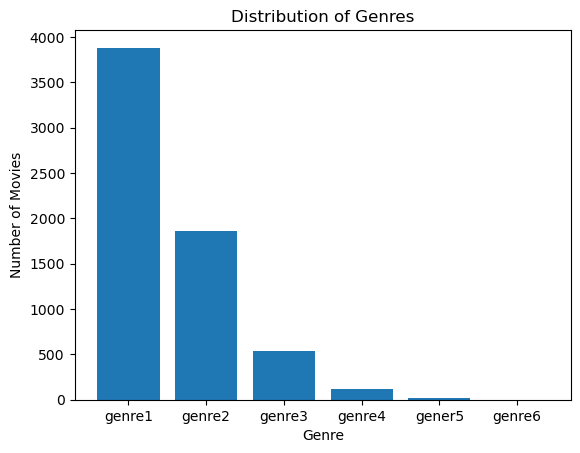

In [30]:
# Plot the distribution of genres
genre_columns = ['genre1', 'genre2', 'genre3', 'genre4', 'gener5', 'genre6']
genre_counts = movies[genre_columns].apply(lambda x: x.notnull()).sum()

plt.bar(genre_counts.index, genre_counts.values)
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Distribution of Genres')
plt.show()

In [31]:
# Display basic statistics of numerical columns
print("Basic Statistics:")
print(movies.describe())

Basic Statistics:
           movieid         year
count  3883.000000  3883.000000
mean   1986.049446  1986.066959
std    1146.778349    16.895690
min       1.000000  1919.000000
25%     982.500000  1982.000000
50%    2010.000000  1994.000000
75%    2980.500000  1997.000000
max    3952.000000  2000.000000


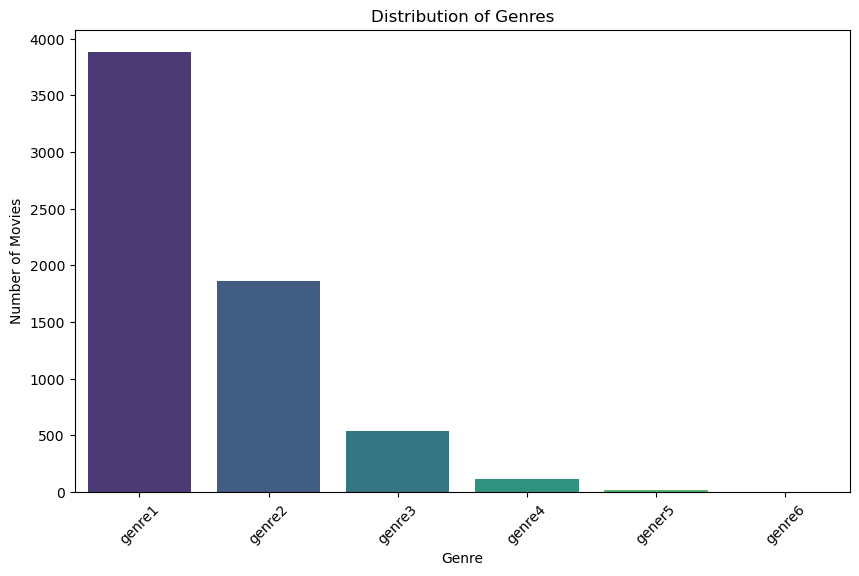

In [32]:
# Visualize the distribution of genres
genre_columns = ['genre1', 'genre2', 'genre3', 'genre4', 'gener5', 'genre6']
genre_counts = movies[genre_columns].apply(lambda x: x.notnull()).sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Distribution of Genres')
plt.xticks(rotation=45)
plt.show()

/Users/sreekanth/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


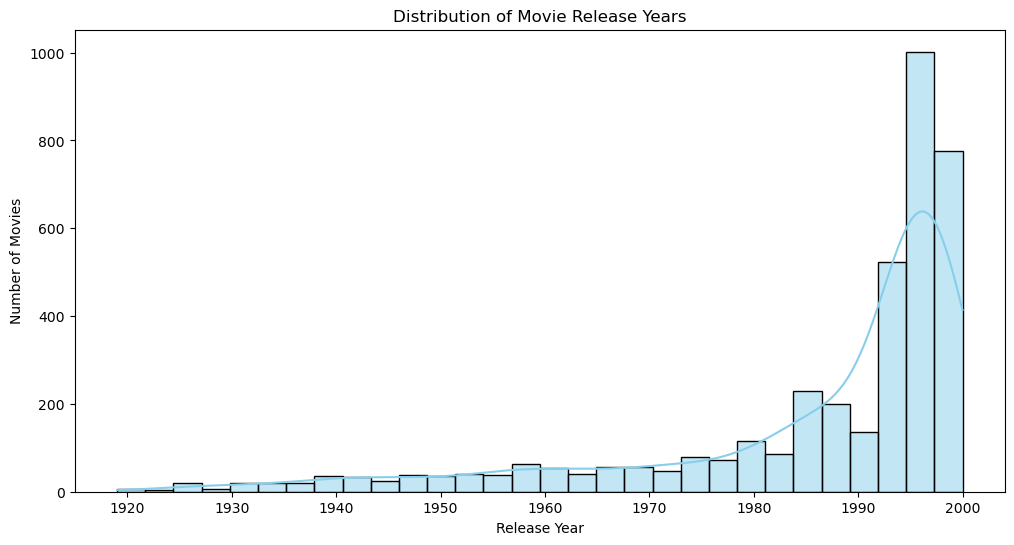

In [33]:
# Visualize the distribution of movie release years
plt.figure(figsize=(12, 6))
sns.histplot(data=movies, x='year', bins=30, kde=True, color="skyblue")
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Release Years')
plt.show()

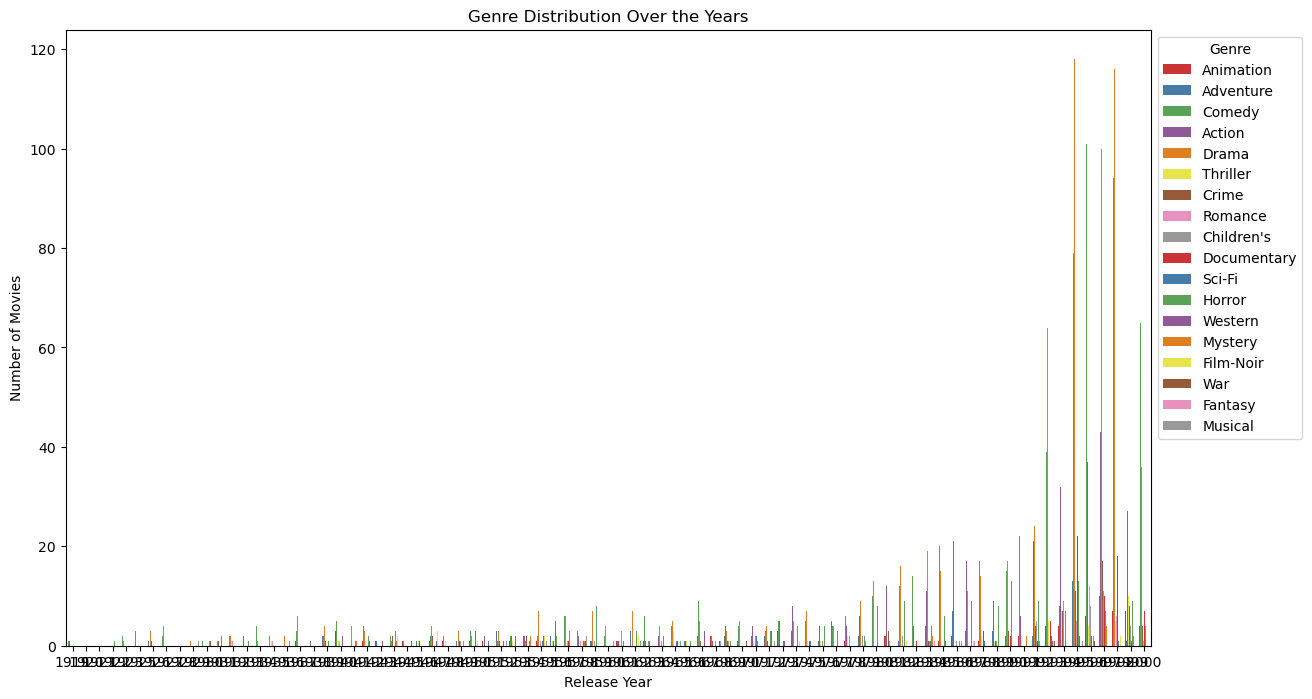

In [34]:
# Explore the relationship between genres and release years
plt.figure(figsize=(14, 8))
sns.countplot(data=movies, x='year', hue='genre1', palette="Set1")
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Genre Distribution Over the Years')
plt.legend(title='Genre', bbox_to_anchor=(1, 1))
plt.show()

/Users/sreekanth/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


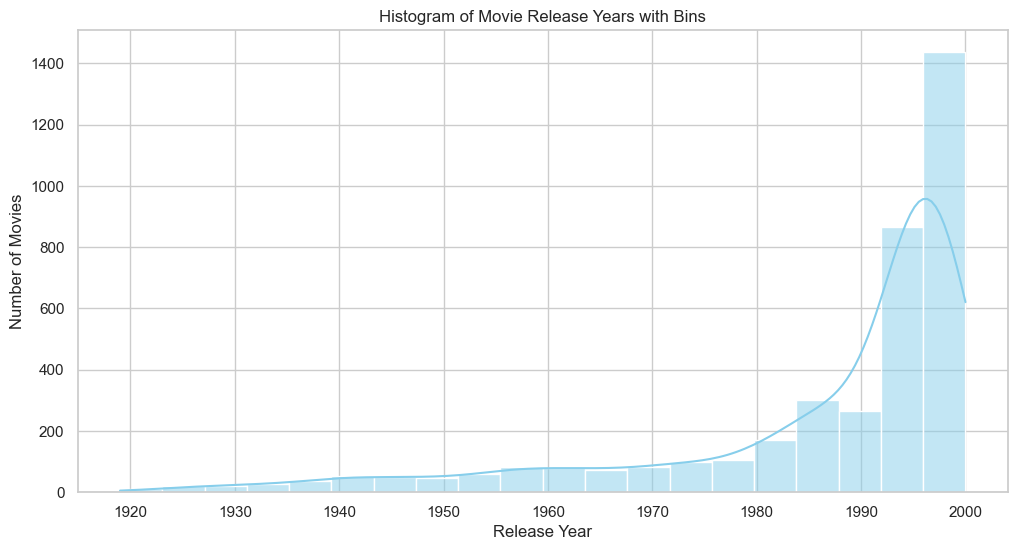

In [35]:
# Set Seaborn style
sns.set(style="whitegrid")

# Create a histogram plot with bins for the 'year' column
plt.figure(figsize=(12, 6))
sns.histplot(data=movies, x='year', bins=20, kde=True, color="skyblue")
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Histogram of Movie Release Years with Bins')
plt.show()

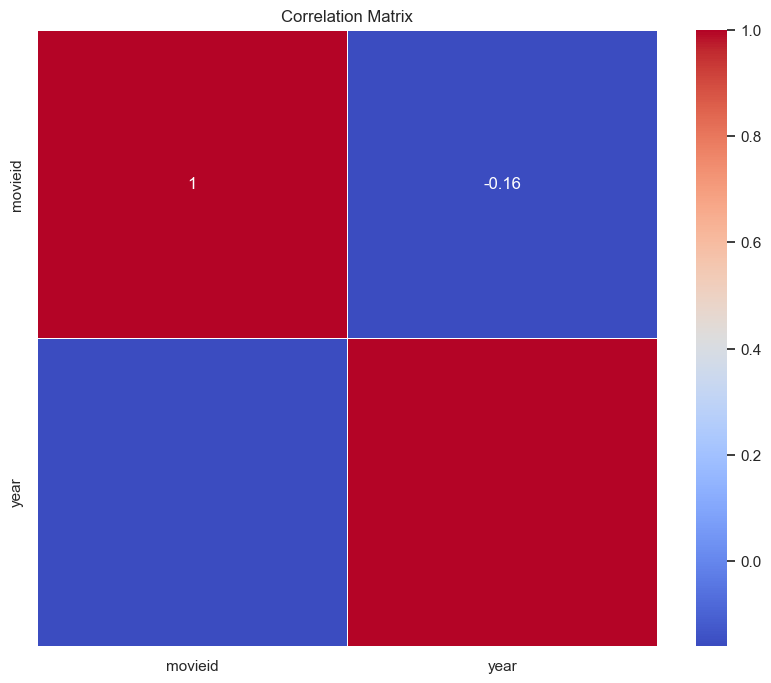

In [36]:
# Correlation matrix to explore relationships between numerical variables
correlation_matrix = movies.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [37]:
# Loop through each column and print value counts
for column in movies.columns:
    print(f"Value counts for column '{column}':")
    print(movies[column].value_counts().head(10))
    print()  


Value counts for column 'movieid':
movieid
1       1
2677    1
2649    1
2650    1
2651    1
2652    1
2653    1
2654    1
2655    1
2656    1
Name: count, dtype: int64

Value counts for column 'movie name':
movie name
Hamlet                                        5
Mummy, The                                    3
Ballad of Narayama, The (Narayama Bushiko)    2
Dracula                                       2
101 Dalmatians                                2
That Darn Cat!                                2
Thomas Crown Affair, The                      2
Kid, The                                      2
Shaft                                         2
My Man Godfrey                                2
Name: count, dtype: int64

Value counts for column 'year':
year
1996    345
1995    342
1998    337
1997    315
1999    283
1994    257
1993    165
2000    156
1986    104
1992    102
Name: count, dtype: int64

Value counts for column 'genre1':
genre1
Drama          1176
Comedy         1024
Action   

In [38]:
users.head(3)

,userid,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117


In [39]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   userid      6040 non-null   object
 1   gender      6040 non-null   object
 2   age         6040 non-null   object
 3   occupation  6040 non-null   object
 4   zipcode     6040 non-null   object
dtypes: object(5)
memory usage: 236.1+ KB


In [40]:
# Convert 'age' to numeric and 'userid' to numeric if applicable
users['age'] = pd.to_numeric(users['age'], errors='coerce')
users['userid'] = pd.to_numeric(users['userid'], errors='coerce')

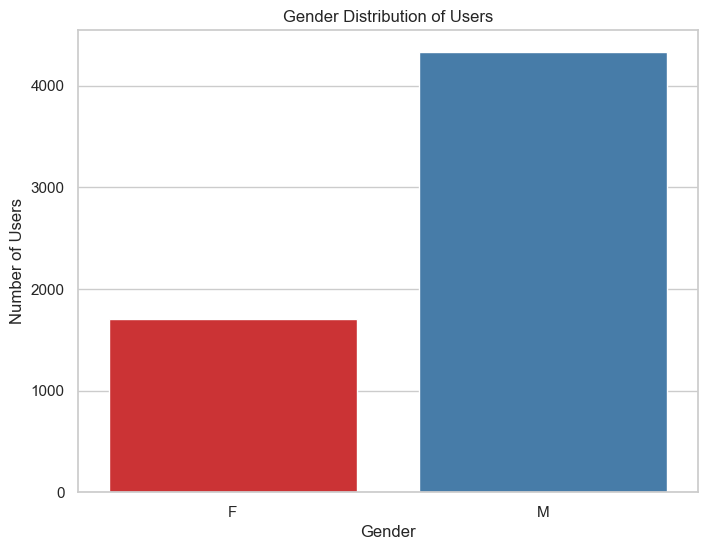

In [41]:
# Set Seaborn style
sns.set(style="whitegrid")

# Visualize gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=users, x='gender', palette="Set1")
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.title('Gender Distribution of Users')
plt.show()

/Users/sreekanth/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


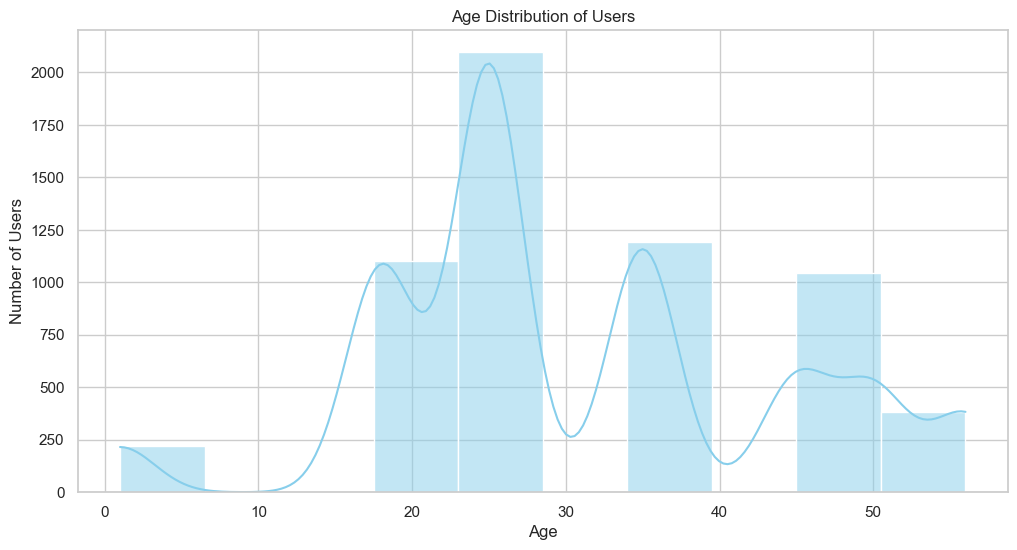

In [42]:
# Visualize age distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=users, x='age', bins=10, kde=True, color="skyblue")
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.title('Age Distribution of Users')
plt.show()

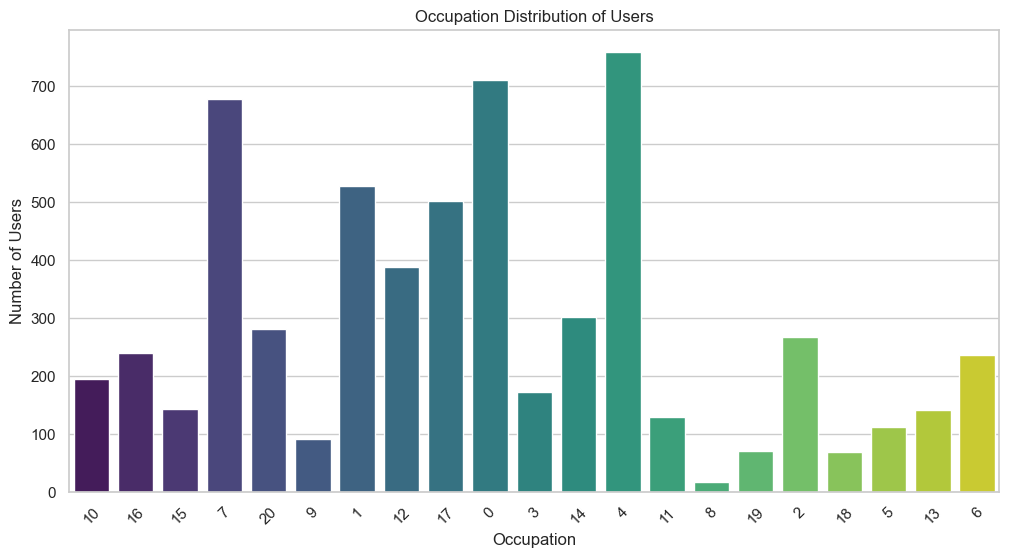

In [43]:
# Visualize occupation distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=users, x='occupation', palette="viridis")
plt.xlabel('Occupation')
plt.ylabel('Number of Users')
plt.title('Occupation Distribution of Users')
plt.xticks(rotation=45)
plt.show()

In [44]:
# Display value counts for each column
for column in users.columns:
    print(f"\nValue Counts for {column}:")
    print(users[column].value_counts().head(10))
    print()


Value Counts for userid:
userid
1       1
4024    1
4033    1
4032    1
4031    1
4030    1
4029    1
4028    1
4027    1
4026    1
Name: count, dtype: int64


Value Counts for gender:
gender
M    4331
F    1709
Name: count, dtype: int64


Value Counts for age:
age
25    2096
35    1193
18    1103
45     550
50     496
56     380
1      222
Name: count, dtype: int64


Value Counts for occupation:
occupation
4     759
0     711
7     679
1     528
17    502
12    388
14    302
20    281
2     267
16    241
Name: count, dtype: int64


Value Counts for zipcode:
zipcode
48104    19
22903    18
55104    17
94110    17
55455    16
55105    16
10025    16
94114    15
55408    15
02138    15
Name: count, dtype: int64



In [45]:
ratings.head(3)

,userid,movieid,rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968


In [46]:
ratings[ratings.duplicated()]

,userid,movieid,rating,Timestamp


In [47]:
ratings.isnull().sum()

userid       0
movieid      0
rating       0
Timestamp    0
dtype: int64

In [48]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userid     1000209 non-null  object
 1   movieid    1000209 non-null  object
 2   rating     1000209 non-null  object
 3   Timestamp  1000209 non-null  object
dtypes: object(4)
memory usage: 30.5+ MB


In [49]:
ratings

,userid,movieid,rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [50]:
# Convert 'userid', 'movieid', 'rating', and 'Timestamp' to appropriate data types
ratings['userid'] = pd.to_numeric(ratings['userid'], errors='coerce')
ratings['movieid'] = pd.to_numeric(ratings['movieid'], errors='coerce')
ratings['rating'] = pd.to_numeric(ratings['rating'], errors='coerce')


In [51]:
ratings

,userid,movieid,rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [52]:
from datetime import datetime

In [53]:
ratings

,userid,movieid,rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [54]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userid     1000209 non-null  int64 
 1   movieid    1000209 non-null  int64 
 2   rating     1000209 non-null  int64 
 3   Timestamp  1000209 non-null  object
dtypes: int64(3), object(1)
memory usage: 30.5+ MB


In [55]:
ratings['timestamp'] = pd.to_datetime(ratings['Timestamp'], unit='s', utc=True)

/var/folders/2z/csc04ssd2ss2yr2k64ypp_l80000gn/T/ipykernel_44348/1452863691.py:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  ratings['timestamp'] = pd.to_datetime(ratings['Timestamp'], unit='s', utc=True)


In [56]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype              
---  ------     --------------    -----              
 0   userid     1000209 non-null  int64              
 1   movieid    1000209 non-null  int64              
 2   rating     1000209 non-null  int64              
 3   Timestamp  1000209 non-null  object             
 4   timestamp  1000209 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(3), object(1)
memory usage: 38.2+ MB


In [57]:
ratings.isnull().sum()

userid       0
movieid      0
rating       0
Timestamp    0
timestamp    0
dtype: int64

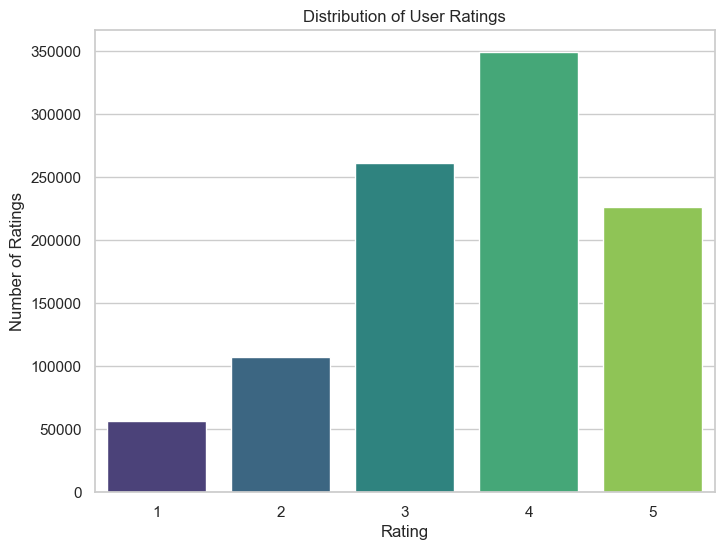

In [58]:
# Set Seaborn style
sns.set(style="whitegrid")

# Visualize the distribution of user ratings
plt.figure(figsize=(8, 6))
sns.countplot(data=ratings, x='rating', palette="viridis")
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.title('Distribution of User Ratings')
plt.show()

In [59]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype              
---  ------     --------------    -----              
 0   userid     1000209 non-null  int64              
 1   movieid    1000209 non-null  int64              
 2   rating     1000209 non-null  int64              
 3   Timestamp  1000209 non-null  object             
 4   timestamp  1000209 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(3), object(1)
memory usage: 38.2+ MB


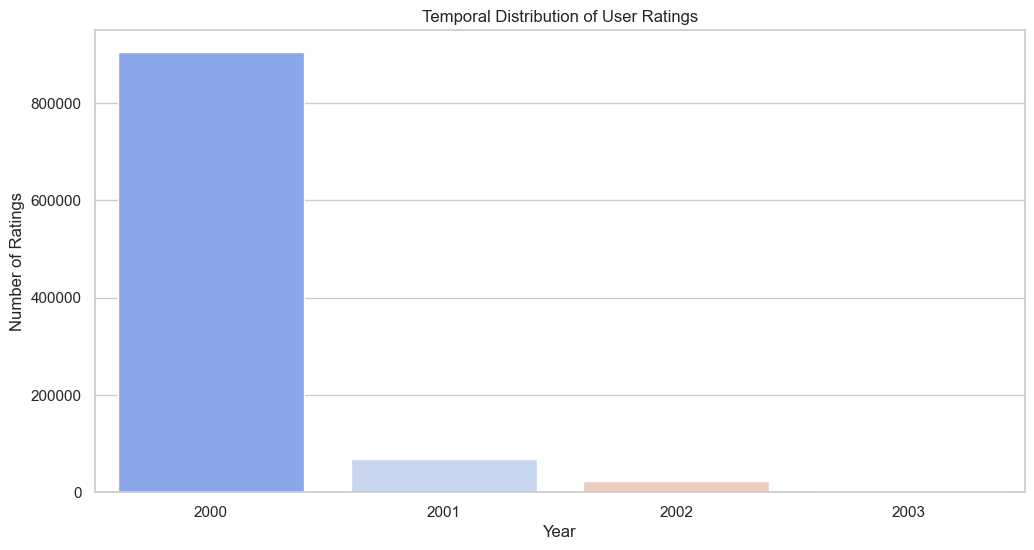

In [60]:
# Explore temporal patterns in user ratings
ratings['Year'] = ratings['timestamp'].dt.year

plt.figure(figsize=(12, 6))
sns.countplot(data=ratings, x='Year', palette="coolwarm")
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.title('Temporal Distribution of User Ratings')
plt.show()

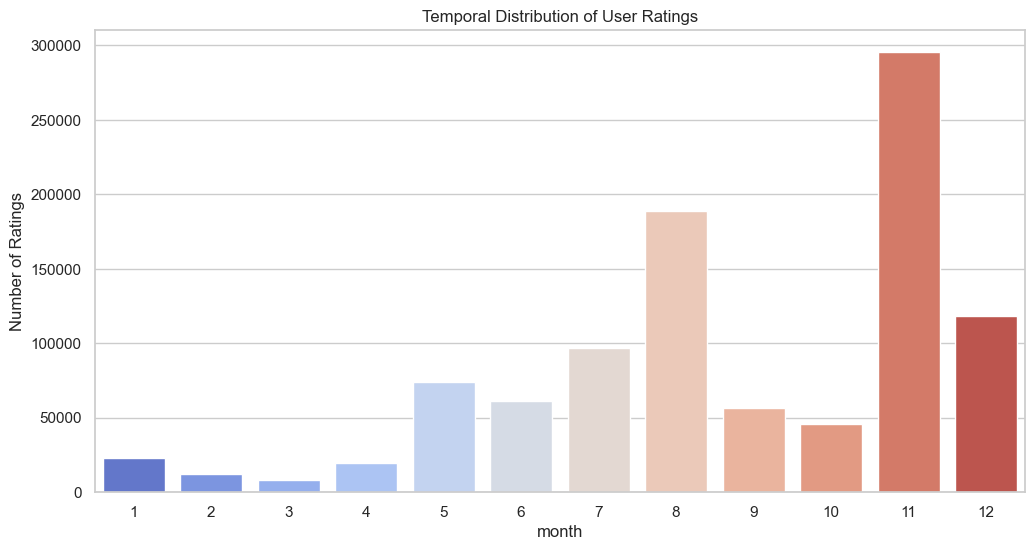

In [61]:
# Explore temporal patterns in user ratings
ratings['month'] = ratings['timestamp'].dt.month

plt.figure(figsize=(12, 6))
sns.countplot(data=ratings, x='month', palette="coolwarm")
plt.xlabel('month')
plt.ylabel('Number of Ratings')
plt.title('Temporal Distribution of User Ratings')
plt.show()

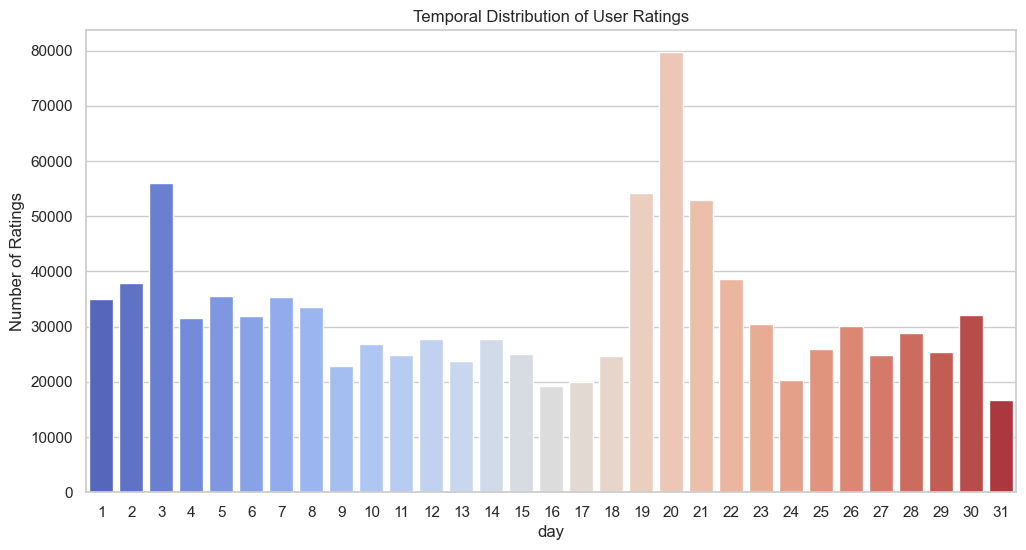

In [62]:
# Explore temporal patterns in user ratings
ratings['day'] = ratings['timestamp'].dt.day

plt.figure(figsize=(12, 6))
sns.countplot(data=ratings, x='day', palette="coolwarm")
plt.xlabel('day')
plt.ylabel('Number of Ratings')
plt.title('Temporal Distribution of User Ratings')
plt.show()

In [63]:
ratings.head(50).tail(10)

,userid,movieid,rating,Timestamp,timestamp,Year,month,day
40,1,1,5,978824268,2001-01-06 23:37:36+00:00,2001,1,6
41,1,1961,5,978301590,2000-12-31 22:26:08+00:00,2000,12,31
42,1,1962,4,978301753,2000-12-31 22:29:20+00:00,2000,12,31
43,1,2692,4,978301570,2000-12-31 22:26:08+00:00,2000,12,31
44,1,260,4,978300760,2000-12-31 22:12:16+00:00,2000,12,31
45,1,1028,5,978301777,2000-12-31 22:29:20+00:00,2000,12,31
46,1,1029,5,978302205,2000-12-31 22:36:48+00:00,2000,12,31
47,1,1207,4,978300719,2000-12-31 22:12:16+00:00,2000,12,31
48,1,2028,5,978301619,2000-12-31 22:27:12+00:00,2000,12,31
49,1,531,4,978302149,2000-12-31 22:35:44+00:00,2000,12,31


In [64]:
# Extract hours, minutes, and seconds and add them as new columns
ratings['hour'] = ratings['timestamp'].dt.hour
ratings['minute'] = ratings['timestamp'].dt.minute
ratings['second'] = ratings['timestamp'].dt.second

In [65]:
ratings

,userid,movieid,rating,Timestamp,timestamp,Year,month,day,hour,minute,second
0,1,1193,5,978300760,2000-12-31 22:12:16+00:00,2000,12,31,22,12,16
1,1,661,3,978302109,2000-12-31 22:34:40+00:00,2000,12,31,22,34,40
2,1,914,3,978301968,2000-12-31 22:32:32+00:00,2000,12,31,22,32,32
3,1,3408,4,978300275,2000-12-31 22:04:48+00:00,2000,12,31,22,4,48
4,1,2355,5,978824291,2001-01-06 23:38:40+00:00,2001,1,6,23,38,40
...,...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,2000-04-26 02:35:44+00:00,2000,4,26,2,35,44
1000205,6040,1094,5,956704887,2000-04-25 23:21:36+00:00,2000,4,25,23,21,36
1000206,6040,562,5,956704746,2000-04-25 23:19:28+00:00,2000,4,25,23,19,28
1000207,6040,1096,4,956715648,2000-04-26 02:20:48+00:00,2000,4,26,2,20,48


In [66]:
ratings = ratings.drop(columns=['Timestamp','timestamp'])

In [67]:
ratings

,userid,movieid,rating,Year,month,day,hour,minute,second
0,1,1193,5,2000,12,31,22,12,16
1,1,661,3,2000,12,31,22,34,40
2,1,914,3,2000,12,31,22,32,32
3,1,3408,4,2000,12,31,22,4,48
4,1,2355,5,2001,1,6,23,38,40
...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,2000,4,26,2,35,44
1000205,6040,1094,5,2000,4,25,23,21,36
1000206,6040,562,5,2000,4,25,23,19,28
1000207,6040,1096,4,2000,4,26,2,20,48


In [68]:
ratings['userid'].unique()

array([   1,    2,    3, ..., 6038, 6039, 6040])

In [69]:
ratings[ratings.duplicated()]

,userid,movieid,rating,Year,month,day,hour,minute,second


In [70]:
ratings

,userid,movieid,rating,Year,month,day,hour,minute,second
0,1,1193,5,2000,12,31,22,12,16
1,1,661,3,2000,12,31,22,34,40
2,1,914,3,2000,12,31,22,32,32
3,1,3408,4,2000,12,31,22,4,48
4,1,2355,5,2001,1,6,23,38,40
...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,2000,4,26,2,35,44
1000205,6040,1094,5,2000,4,25,23,21,36
1000206,6040,562,5,2000,4,25,23,19,28
1000207,6040,1096,4,2000,4,26,2,20,48


In [71]:
ratings['movieid'].nunique()

3706

In [72]:
users

,userid,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [73]:
movies

,movieid,movie name,year,genre1,genre2,genre3,genre4,gener5,genre6
0,1,Toy Story,1995,Animation,Children's,Comedy,None,None,None
1,2,Jumanji,1995,Adventure,Children's,Fantasy,None,None,None
2,3,Grumpier Old Men,1995,Comedy,Romance,None,None,None,None
3,4,Waiting to Exhale,1995,Comedy,Drama,None,None,None,None
4,5,Father of the Bride Part II,1995,Comedy,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents,2000,Comedy,None,None,None,None,None
3879,3949,Requiem for a Dream,2000,Drama,None,None,None,None,None
3880,3950,Tigerland,2000,Drama,None,None,None,None,None
3881,3951,Two Family House,2000,Drama,None,None,None,None,None


In [74]:
movies['movieid'].nunique()

3883

In [75]:
#Merge data frames on the common column
merged_df = pd.merge(users, ratings, on='userid', how='inner') 

In [76]:
#Merge data frames on the common column
merged_df1 = pd.merge(merged_df, movies, on='movieid', how='inner') 

In [77]:
zee_df=merged_df1
zee_df.to_csv("zee_data.csv",index=False)

In [78]:
zee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 21 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   userid      1000209 non-null  int64 
 1   gender      1000209 non-null  object
 2   age         1000209 non-null  int64 
 3   occupation  1000209 non-null  object
 4   zipcode     1000209 non-null  object
 5   movieid     1000209 non-null  int64 
 6   rating      1000209 non-null  int64 
 7   Year        1000209 non-null  int32 
 8   month       1000209 non-null  int32 
 9   day         1000209 non-null  int32 
 10  hour        1000209 non-null  int32 
 11  minute      1000209 non-null  int32 
 12  second      1000209 non-null  int32 
 13  movie name  1000209 non-null  object
 14  year        1000209 non-null  int64 
 15  genre1      1000209 non-null  object
 16  genre2      689510 non-null   object
 17  genre3      304986 non-null   object
 18  genre4      93496 non-null    object
 19  

In [79]:
zee_df['relese year']=zee_df['year']

In [80]:
zee_df.head()

,userid,gender,age,occupation,zipcode,movieid,rating,Year,month,day,...,second,movie name,year,genre1,genre2,genre3,genre4,gener5,genre6,relese year
0,1,F,1,10,48067,1193,5,2000,12,31,...,16,One Flew Over the Cuckoo's Nest,1975,Drama,None,None,None,None,None,1975
1,2,M,56,16,70072,1193,5,2000,12,31,...,52,One Flew Over the Cuckoo's Nest,1975,Drama,None,None,None,None,None,1975
2,12,M,25,12,32793,1193,4,2000,12,30,...,20,One Flew Over the Cuckoo's Nest,1975,Drama,None,None,None,None,None,1975
3,15,M,25,7,22903,1193,4,2000,12,30,...,36,One Flew Over the Cuckoo's Nest,1975,Drama,None,None,None,None,None,1975
4,17,M,50,1,95350,1193,5,2000,12,30,...,4,One Flew Over the Cuckoo's Nest,1975,Drama,None,None,None,None,None,1975


In [81]:
zee_df.columns

Index(['userid', 'gender', 'age', 'occupation', 'zipcode', 'movieid', 'rating',
       'Year', 'month', 'day', 'hour', 'minute', 'second', 'movie name',
       'year', 'genre1', 'genre2', 'genre3', 'genre4', 'gener5', 'genre6',
       'relese year'],
      dtype='object')

In [82]:
zee_df = zee_df.drop(columns=['year'])

In [83]:
zee_df

,userid,gender,age,occupation,zipcode,movieid,rating,Year,month,day,...,minute,second,movie name,genre1,genre2,genre3,genre4,gener5,genre6,relese year
0,1,F,1,10,48067,1193,5,2000,12,31,...,12,16,One Flew Over the Cuckoo's Nest,Drama,None,None,None,None,None,1975
1,2,M,56,16,70072,1193,5,2000,12,31,...,33,52,One Flew Over the Cuckoo's Nest,Drama,None,None,None,None,None,1975
2,12,M,25,12,32793,1193,4,2000,12,30,...,49,20,One Flew Over the Cuckoo's Nest,Drama,None,None,None,None,None,1975
3,15,M,25,7,22903,1193,4,2000,12,30,...,1,36,One Flew Over the Cuckoo's Nest,Drama,None,None,None,None,None,1975
4,17,M,50,1,95350,1193,5,2000,12,30,...,41,4,One Flew Over the Cuckoo's Nest,Drama,None,None,None,None,None,1975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,5949,M,18,17,47901,2198,5,2000,5,20,...,13,20,Modulations,Documentary,None,None,None,None,None,1998
1000205,5675,M,35,14,30030,2703,3,2000,12,5,...,12,0,Broken Vessels,Drama,None,None,None,None,None,1998
1000206,5780,M,18,17,92886,2845,1,2000,5,12,...,38,8,White Boys,Drama,None,None,None,None,None,1999
1000207,5851,F,18,20,55410,3607,5,2000,5,8,...,30,8,One Little Indian,Comedy,Drama,Western,None,None,None,1973


In [84]:
zee_df.zipcode.unique()

array(['48067', '70072', '32793', ..., '74403', '79401', '77662'],
      dtype=object)

In [85]:
order=['userid','gender', 'age', 'occupation', 'zipcode', 'movieid', 'rating',
       'Year', 'month', 'day', 'hour', 'minute', 'second', 'movie name','relese year', 
 'genre1', 'genre2', 'genre3', 'genre4', 'gener5', 'genre6',
       ]

In [86]:
zee_df=zee_df[order]

In [87]:
zee_df.isnull().sum()

userid              0
gender              0
age                 0
occupation          0
zipcode             0
movieid             0
rating              0
Year                0
month               0
day                 0
hour                0
minute              0
second              0
movie name          0
relese year         0
genre1              0
genre2         310699
genre3         695223
genre4         906713
gener5         986826
genre6         999978
dtype: int64

# Handlling Missing Values 

In [89]:
# Clean the 'ZipCode' column by removing hyphens
zee_df['zipcode'] = zee_df['zipcode'].str.replace('-', '')

In [90]:
zee_df['occupation']=zee_df['occupation'].astype(int)
zee_df['zipcode']=zee_df['zipcode'].astype(int)

In [91]:
zee_df.head()

,userid,gender,age,occupation,zipcode,movieid,rating,Year,month,day,...,minute,second,movie name,relese year,genre1,genre2,genre3,genre4,gener5,genre6
0,1,F,1,10,48067,1193,5,2000,12,31,...,12,16,One Flew Over the Cuckoo's Nest,1975,Drama,None,None,None,None,None
1,2,M,56,16,70072,1193,5,2000,12,31,...,33,52,One Flew Over the Cuckoo's Nest,1975,Drama,None,None,None,None,None
2,12,M,25,12,32793,1193,4,2000,12,30,...,49,20,One Flew Over the Cuckoo's Nest,1975,Drama,None,None,None,None,None
3,15,M,25,7,22903,1193,4,2000,12,30,...,1,36,One Flew Over the Cuckoo's Nest,1975,Drama,None,None,None,None,None
4,17,M,50,1,95350,1193,5,2000,12,30,...,41,4,One Flew Over the Cuckoo's Nest,1975,Drama,None,None,None,None,None


In [92]:
from sklearn.preprocessing import LabelEncoder

In [93]:
# Columns to label encode
columns_to_encode = ['userid','occupation','zipcode','movie name', 'genre1', 'genre2', 'genre3', 'genre4', 'gener5', 'genre6']

# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to selected columns
zee_df[columns_to_encode] = zee_df[columns_to_encode].apply(lambda col: label_encoder.fit_transform(col))


In [94]:
zee_df

,userid,gender,age,occupation,zipcode,movieid,rating,Year,month,day,...,minute,second,movie name,relese year,genre1,genre2,genre3,genre4,gener5,genre6
0,0,F,1,10,1552,1193,5,2000,12,31,...,12,16,2422,1975,7,17,15,13,6,1
1,1,M,56,16,2194,1193,5,2000,12,31,...,33,52,2422,1975,7,17,15,13,6,1
2,11,M,25,12,1137,1193,4,2000,12,30,...,49,20,2422,1975,7,17,15,13,6,1
3,14,M,25,7,881,1193,4,2000,12,30,...,1,36,2422,1975,7,17,15,13,6,1
4,16,M,50,1,3114,1193,5,2000,12,30,...,41,4,2422,1975,7,17,15,13,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,5948,M,18,17,1542,2198,5,2000,5,20,...,13,20,2177,1998,6,17,15,13,6,1
1000205,5674,M,35,14,1032,2703,3,2000,12,5,...,12,0,538,1998,7,17,15,13,6,1
1000206,5779,M,18,17,2928,2845,1,2000,5,12,...,38,8,3568,1999,7,17,15,13,6,1
1000207,5850,F,18,20,1858,3607,5,2000,5,8,...,30,8,2423,1973,4,6,14,13,6,1


In [95]:
zee_df.isnull().sum()

userid         0
gender         0
age            0
occupation     0
zipcode        0
movieid        0
rating         0
Year           0
month          0
day            0
hour           0
minute         0
second         0
movie name     0
relese year    0
genre1         0
genre2         0
genre3         0
genre4         0
gener5         0
genre6         0
dtype: int64

In [96]:
# Create a mapping dictionary
gender_mapping = {'M': 1, 'F': 0}

# Map the 'Gender' column using the dictionary
zee_df['gender'] = zee_df['gender'].map(gender_mapping)

In [97]:
zee_df.head()

,userid,gender,age,occupation,zipcode,movieid,rating,Year,month,day,...,minute,second,movie name,relese year,genre1,genre2,genre3,genre4,gener5,genre6
0,0,0,1,10,1552,1193,5,2000,12,31,...,12,16,2422,1975,7,17,15,13,6,1
1,1,1,56,16,2194,1193,5,2000,12,31,...,33,52,2422,1975,7,17,15,13,6,1
2,11,1,25,12,1137,1193,4,2000,12,30,...,49,20,2422,1975,7,17,15,13,6,1
3,14,1,25,7,881,1193,4,2000,12,30,...,1,36,2422,1975,7,17,15,13,6,1
4,16,1,50,1,3114,1193,5,2000,12,30,...,41,4,2422,1975,7,17,15,13,6,1


In [98]:
zee_df.isnull().sum()

userid         0
gender         0
age            0
occupation     0
zipcode        0
movieid        0
rating         0
Year           0
month          0
day            0
hour           0
minute         0
second         0
movie name     0
relese year    0
genre1         0
genre2         0
genre3         0
genre4         0
gener5         0
genre6         0
dtype: int64

In [99]:
zee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 21 columns):
 #   Column       Non-Null Count    Dtype
---  ------       --------------    -----
 0   userid       1000209 non-null  int64
 1   gender       1000209 non-null  int64
 2   age          1000209 non-null  int64
 3   occupation   1000209 non-null  int64
 4   zipcode      1000209 non-null  int64
 5   movieid      1000209 non-null  int64
 6   rating       1000209 non-null  int64
 7   Year         1000209 non-null  int32
 8   month        1000209 non-null  int32
 9   day          1000209 non-null  int32
 10  hour         1000209 non-null  int32
 11  minute       1000209 non-null  int32
 12  second       1000209 non-null  int32
 13  movie name   1000209 non-null  int64
 14  relese year  1000209 non-null  int64
 15  genre1       1000209 non-null  int64
 16  genre2       1000209 non-null  int64
 17  genre3       1000209 non-null  int64
 18  genre4       1000209 non-null  int64
 19  

In [100]:
# Summary statistics
summary_stats = zee_df.describe()
summary_stats

,userid,gender,age,occupation,zipcode,movieid,rating,Year,month,day,...,minute,second,movie name,relese year,genre1,genre2,genre3,genre4,gener5,genre6
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,...,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.023512e+03,7.536115e-01,2.973831e+01,8.036138e+00,1.792248e+03,1.865540e+03,3.581564e+00,2.000126e+03,8.710391e+00,1.544055e+01,...,2.937568e+01,2.804158e+01,1.827060e+03,1.986698e+03,4.290135e+00,1.068906e+01,1.311338e+01,1.254954e+01,5.968511e+00,9.997690e-01
std,1.728413e+03,4.309076e-01,1.175198e+01,6.531336e+00,9.971804e+02,1.096041e+03,1.117102e+00,4.223923e-01,2.717467e+00,8.888412e+00,...,1.726493e+01,1.726580e+01,1.078749e+03,1.434933e+01,3.743897e+00,5.983349e+00,3.559681e+00,1.617578e+00,3.221345e-01,1.519535e-02
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,1.919000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.505000e+03,1.000000e+00,2.500000e+01,2.000000e+00,9.170000e+02,1.030000e+03,3.000000e+00,2.000000e+03,7.000000e+00,7.000000e+00,...,1.400000e+01,1.200000e+01,9.170000e+02,1.982000e+03,0.000000e+00,6.000000e+00,1.200000e+01,1.300000e+01,6.000000e+00,1.000000e+00
50%,3.069000e+03,1.000000e+00,2.500000e+01,7.000000e+00,1.852000e+03,1.835000e+03,4.000000e+00,2.000000e+03,9.000000e+00,1.700000e+01,...,2.900000e+01,2.800000e+01,1.826000e+03,1.992000e+03,4.000000e+00,1.200000e+01,1.500000e+01,1.300000e+01,6.000000e+00,1.000000e+00
75%,4.475000e+03,1.000000e+00,3.500000e+01,1.400000e+01,2.703000e+03,2.770000e+03,4.000000e+00,2.000000e+03,1.100000e+01,2.200000e+01,...,4.400000e+01,4.400000e+01,2.801000e+03,1.997000e+03,7.000000e+00,1.700000e+01,1.500000e+01,1.300000e+01,6.000000e+00,1.000000e+00
max,6.039000e+03,1.000000e+00,5.600000e+01,2.000000e+01,3.438000e+03,3.952000e+03,5.000000e+00,2.003000e+03,1.200000e+01,3.100000e+01,...,5.900000e+01,5.600000e+01,3.663000e+03,2.000000e+03,1.700000e+01,1.700000e+01,1.500000e+01,1.300000e+01,6.000000e+00,1.000000e+00


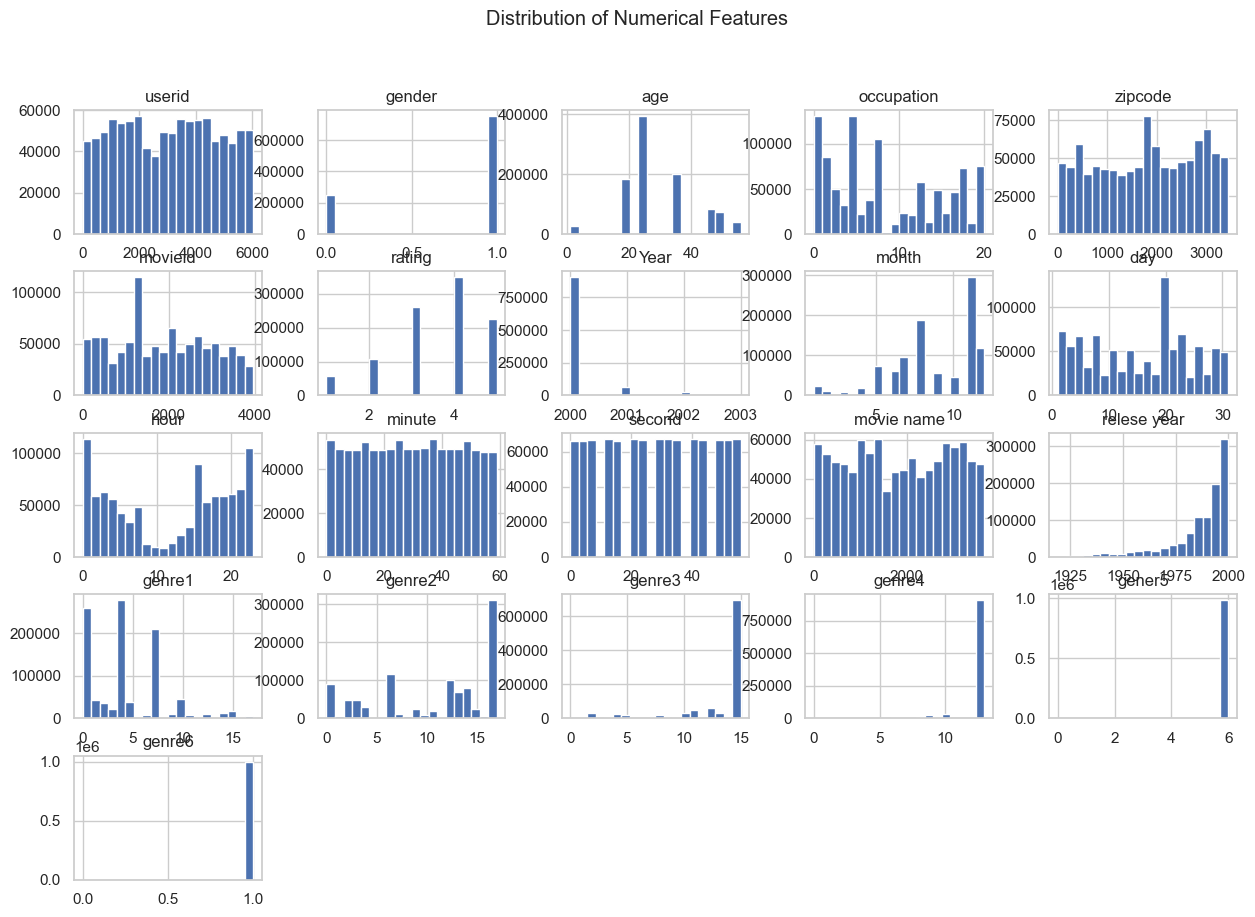

In [101]:
# Distribution of numerical features
numerical_features = zee_df.select_dtypes(include=['int64', 'int32'])
numerical_features.hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()

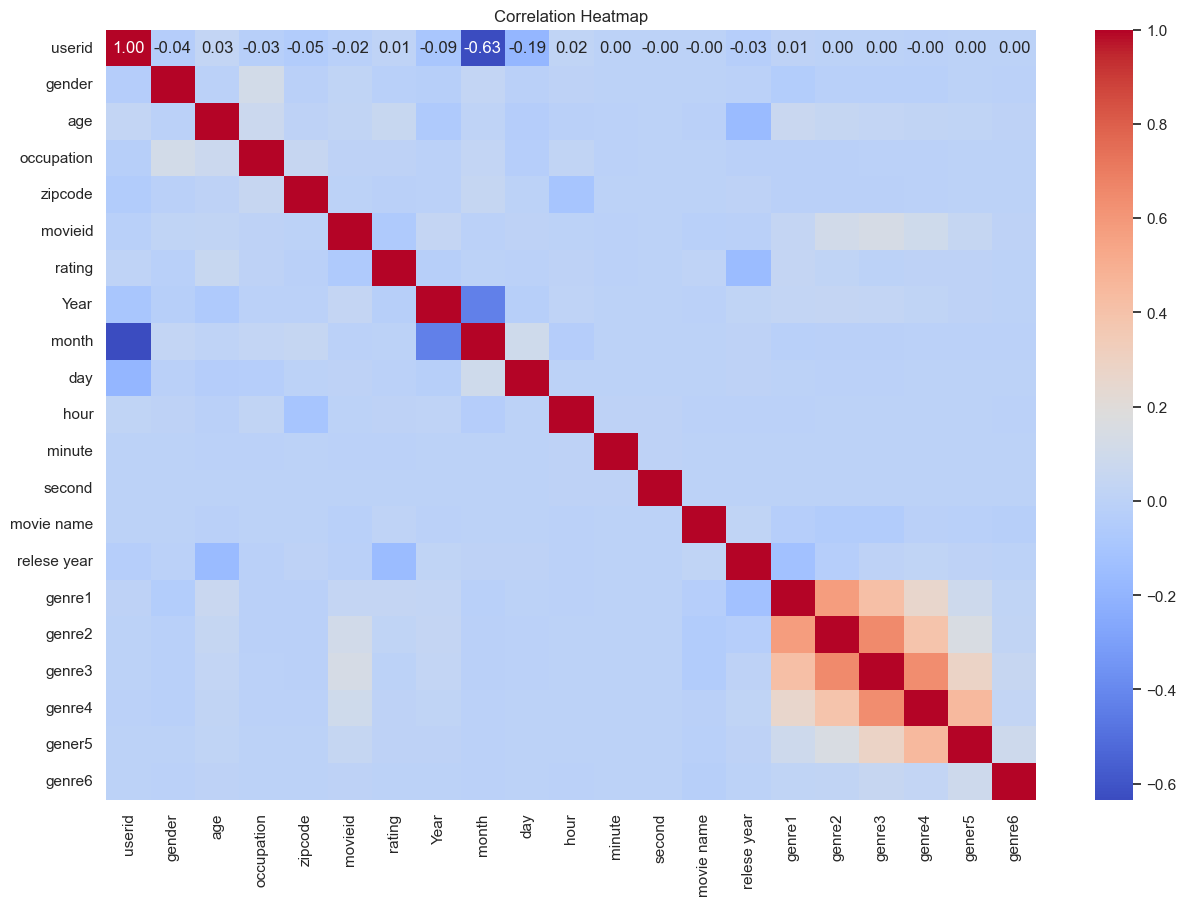

In [102]:
# Correlation heatmap
correlation_matrix = zee_df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

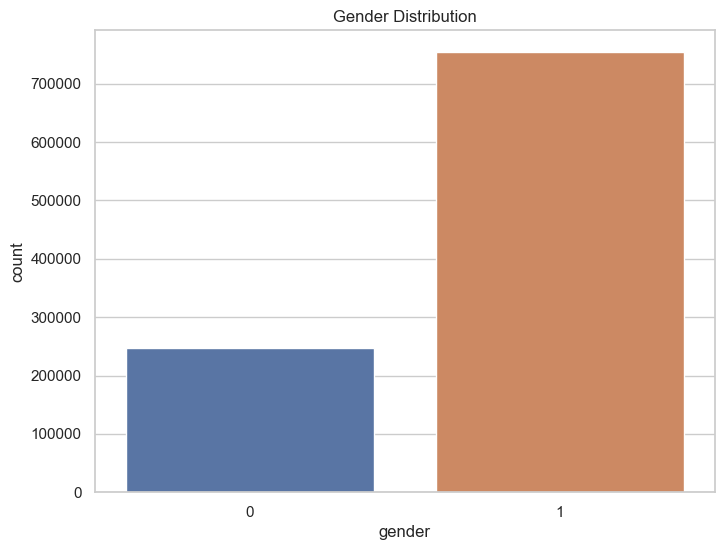

In [103]:
# Gender distribution
gender_distribution = zee_df['gender'].value_counts()
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=zee_df)
plt.title('Gender Distribution')
plt.show()

/Users/sreekanth/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


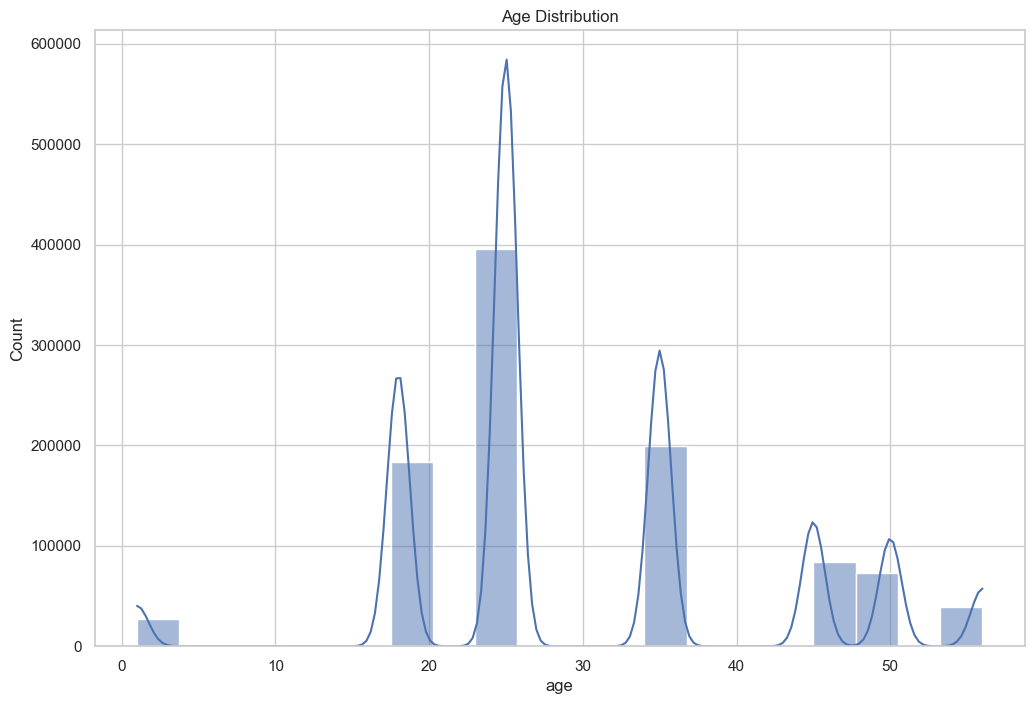

In [104]:
# Age distribution
plt.figure(figsize=(12, 8))
sns.histplot(zee_df['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

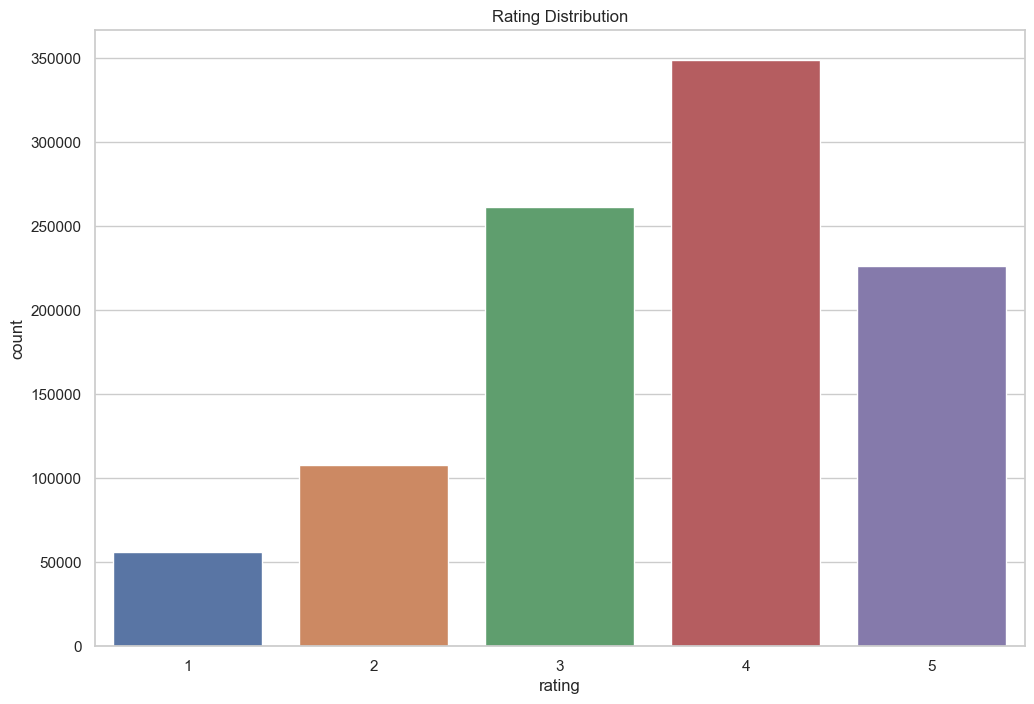

In [105]:
# Rating distribution
plt.figure(figsize=(12, 8))
sns.countplot(x='rating', data=zee_df)
plt.title('Rating Distribution')
plt.show()

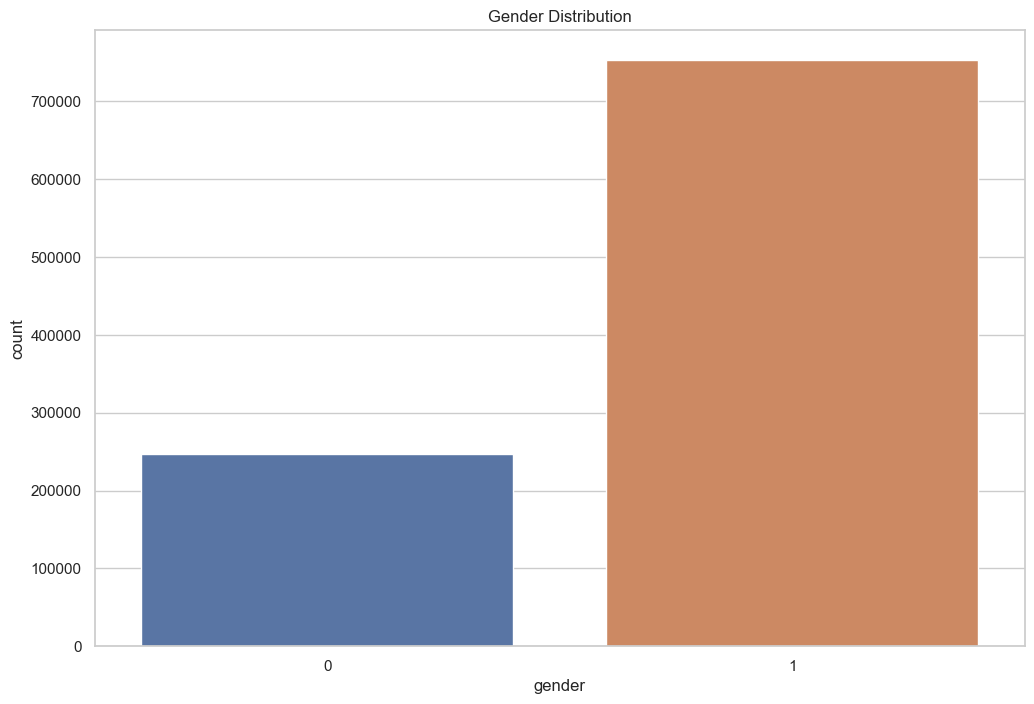

In [106]:
# Rating distribution
plt.figure(figsize=(12, 8))
sns.countplot(x='gender', data=zee_df)
plt.title('Gender Distribution')
plt.show()

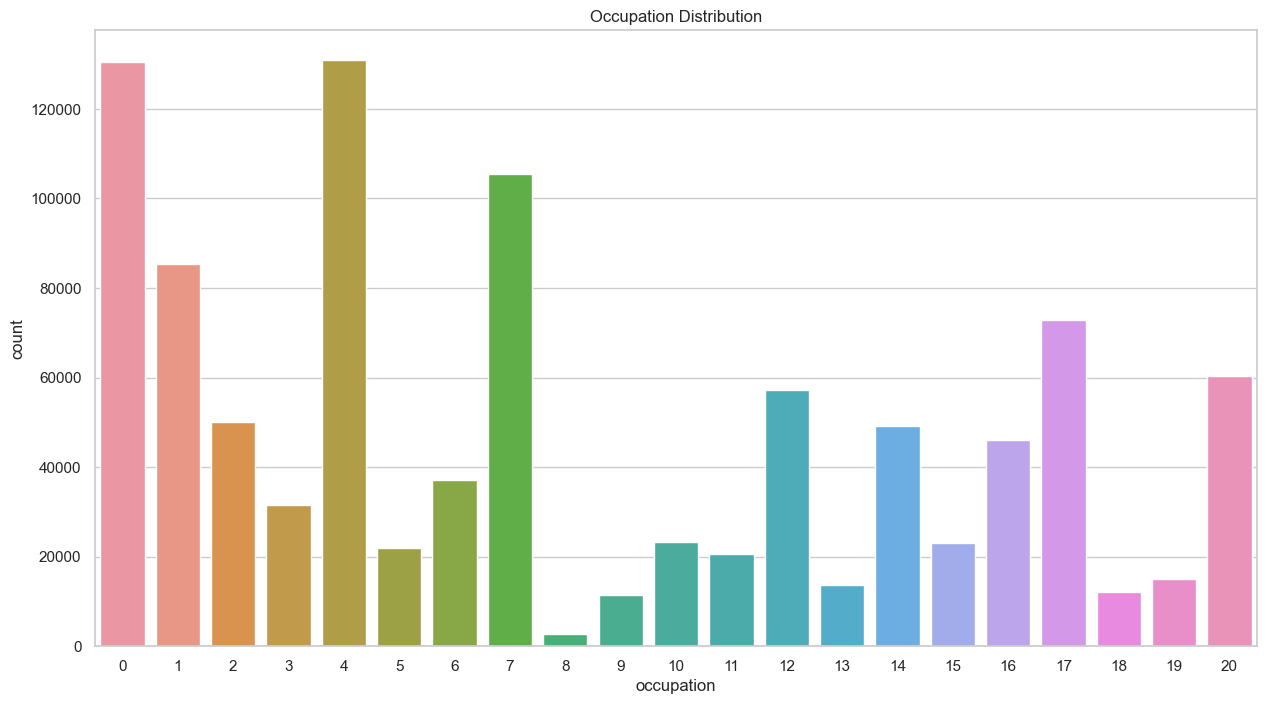

In [107]:
# Occupation distribution
plt.figure(figsize=(15, 8))
sns.countplot(x='occupation', data=zee_df)
plt.title('Occupation Distribution')
plt.show()

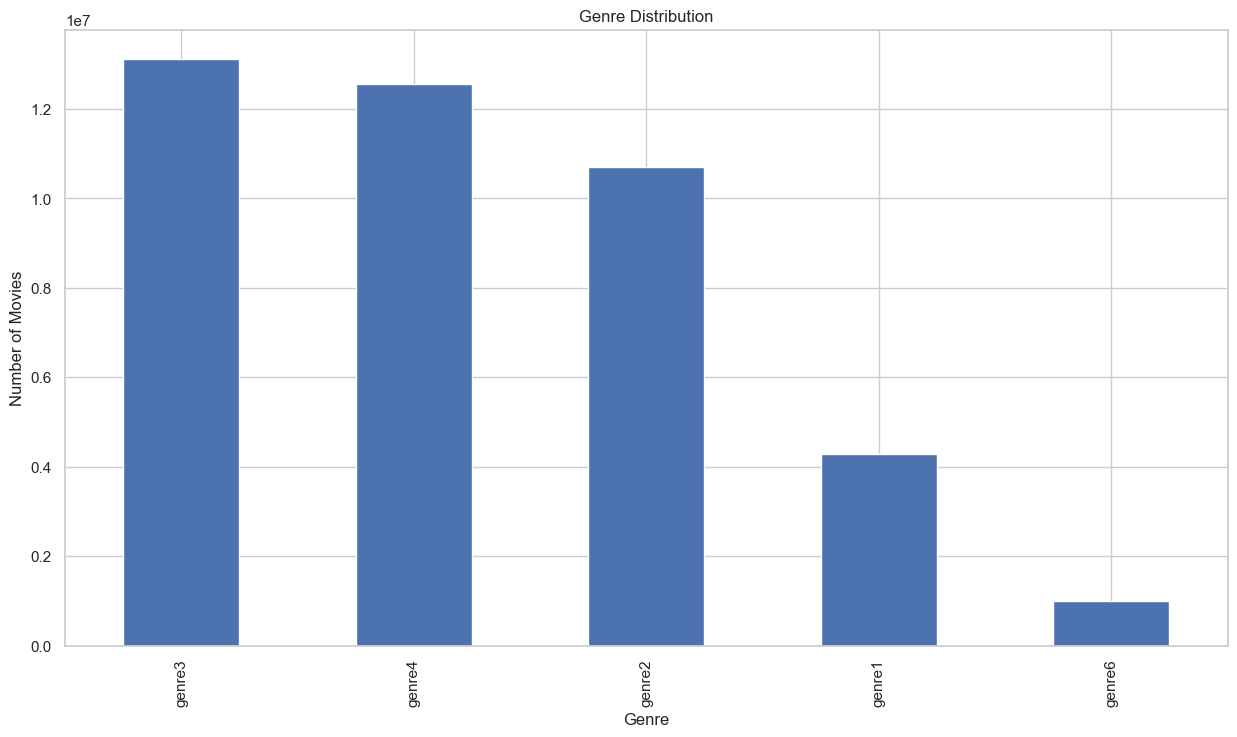

In [108]:
# Genre distribution
genre_columns = ['genre1', 'genre2', 'genre3', 'genre4', 'genre6',]
genre_distribution = zee_df[genre_columns].sum().sort_values(ascending=False)
plt.figure(figsize=(15, 8))
genre_distribution.plot(kind='bar')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.show()

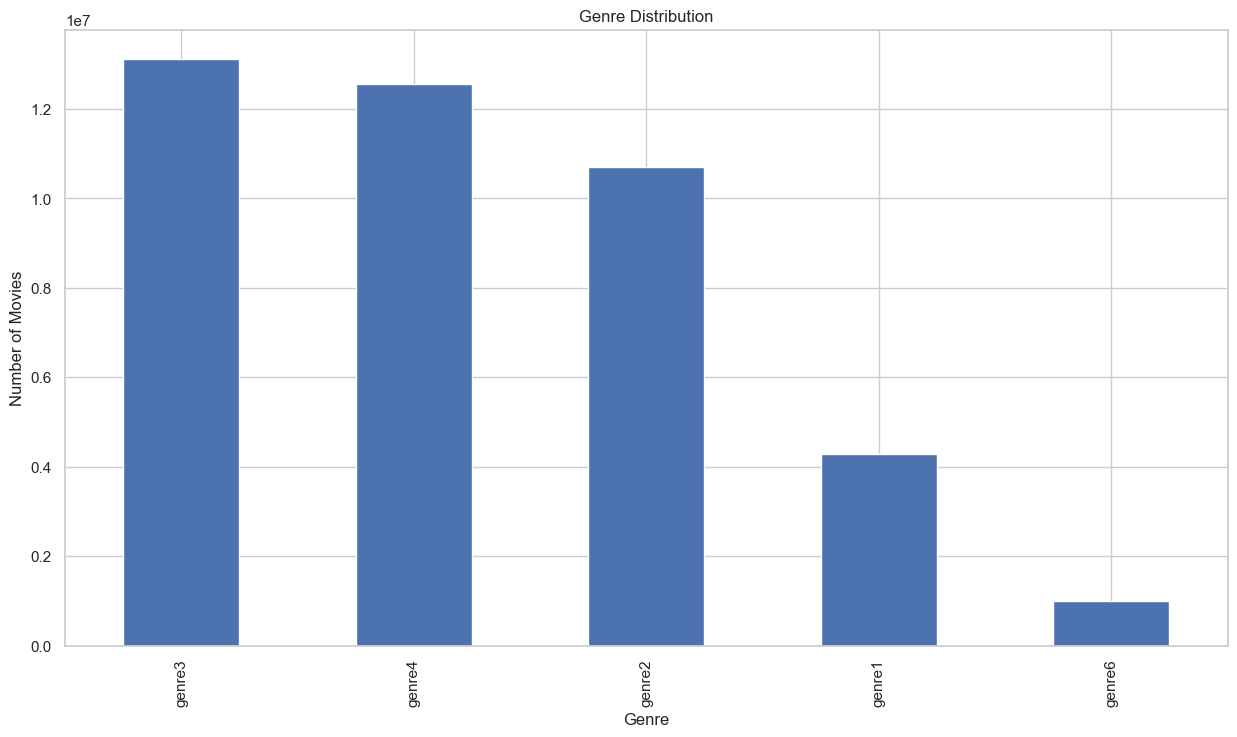

In [109]:
# Genre distribution
genre_columns = [ 'genre1', 'genre2', 'genre3', 'genre4', 'genre6']

# Corrected code (assuming these columns should exist):
genre_distribution = zee_df[genre_columns].sum().sort_values(ascending=False)
plt.figure(figsize=(15, 8))
genre_distribution.plot(kind='bar')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.show()


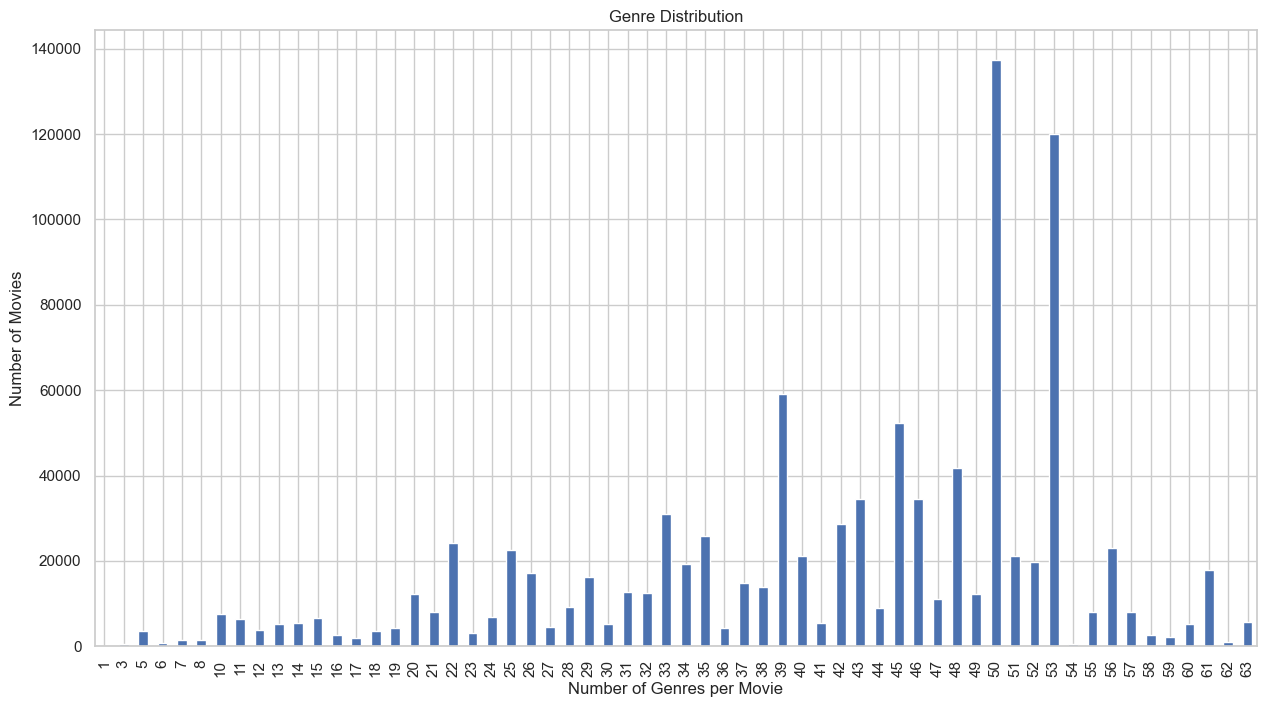

In [110]:
# Genre distribution
genre_columns = [ 'genre1', 'genre2', 'genre3', 'genre4', 'genre6']
genre_distribution = zee_df[genre_columns].apply(lambda x: x.sum(), axis=1).value_counts().sort_index()

plt.figure(figsize=(15, 8))
genre_distribution.plot(kind='bar')
plt.title('Genre Distribution')
plt.xlabel('Number of Genres per Movie')
plt.ylabel('Number of Movies')
plt.show()


In [111]:
zee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 21 columns):
 #   Column       Non-Null Count    Dtype
---  ------       --------------    -----
 0   userid       1000209 non-null  int64
 1   gender       1000209 non-null  int64
 2   age          1000209 non-null  int64
 3   occupation   1000209 non-null  int64
 4   zipcode      1000209 non-null  int64
 5   movieid      1000209 non-null  int64
 6   rating       1000209 non-null  int64
 7   Year         1000209 non-null  int32
 8   month        1000209 non-null  int32
 9   day          1000209 non-null  int32
 10  hour         1000209 non-null  int32
 11  minute       1000209 non-null  int32
 12  second       1000209 non-null  int32
 13  movie name   1000209 non-null  int64
 14  relese year  1000209 non-null  int64
 15  genre1       1000209 non-null  int64
 16  genre2       1000209 non-null  int64
 17  genre3       1000209 non-null  int64
 18  genre4       1000209 non-null  int64
 19  

# Build a Recommender System based on Pearson Correlation

In [113]:
from sklearn.metrics.pairwise import pairwise_distances
from scipy.spatial.distance import correlation

In [ ]:
# Step 1: Create a user-item matrix
user_item_matrix = zee_df.pivot_table(index='movie name', columns='userid', values='rating', fill_value=0)

# Step 2: Calculate the Pearson correlation between movies
movie_correlation = 1 - pairwise_distances(user_item_matrix, metric='correlation')

# Step 3: Take a movie name as input from the user
user_input_movie = input("Enter a movie name: ")

# Step 4: Retrieve correlation scores for the input movie
input_movie_correlation = movie_correlation[user_input_movie].reshape(-1, 1)

# Step 5: Recommend 5 similar movies based on Pearson Correlation
similar_movies = pd.DataFrame(np.dot(movie_correlation, input_movie_correlation), index=user_item_matrix.index, columns=['Correlation'])
top_recommendations = similar_movies.sort_values('Correlation', ascending=False).head(6)[1:]

print(f"\nTop 5 movies similar to '{user_input_movie}':")
print(top_recommendations)


# Cosine Similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Step 1: Create a user-item matrix
user_item_matrix = zee_df.pivot_table(index='userid', columns='movie name', values='rating', fill_value=0)

# Step 2: Calculate the Cosine Similarity between users and items
user_similarity_matrix = pd.DataFrame(cosine_similarity(user_item_matrix), index=user_item_matrix.index, columns=user_item_matrix.index)
item_similarity_matrix = pd.DataFrame(cosine_similarity(user_item_matrix.T), index=user_item_matrix.columns, columns=user_item_matrix.columns)

# Step 3: Print the user similarity matrix and item similarity matrix
print("\nUser Similarity Matrix:")
print(user_similarity_matrix)

print("\nItem Similarity Matrix:")
print(item_similarity_matrix)

# Create a CSR matrix using the pivot table.

In [ ]:
from scipy.sparse import csr_matrix

In [ ]:
# Create a user-item matrix (pivot table)
user_item_matrix = zee_df.pivot_table(index='userid', columns='movie name', values='rating', fill_value=0)

# Convert the user-item matrix to a CSR matrix
csr_matrix_user_item = csr_matrix(user_item_matrix.values)

# Print the CSR matrix (for demonstration purposes)
print("\nCSR Matrix (User-Item):")
print(csr_matrix_user_item)

In [ ]:
# Step 1: Create a user-item matrix
user_item_matrix = zee_df.pivot_table(index='userid', columns='movie name', values='rating', fill_value=0)

# Step 2: Calculate the Cosine Similarity between users and items
item_similarity_matrix = pd.DataFrame(cosine_similarity(user_item_matrix.T), index=user_item_matrix.columns, columns=user_item_matrix.columns)

# Step 3: Write a function to return top 5 recommendations for a given item
def get_top_recommendations(item_name, user_item_matrix, item_similarity_matrix, n=5):
    # Check if the item exists in the user-item matrix
    if item_name not in user_item_matrix.columns:
        return f"Item '{item_name}' not found in the dataset."

    # Calculate the cosine similarity between the given item and all other items
    item_similarity = item_similarity_matrix[item_name]

    # Get top N similar items based on cosine similarity
    top_similar_items = item_similarity.sort_values(ascending=False).head(n+1)[1:]

    # Extract the item names from the index
    top_item_names = top_similar_items.index

    return top_item_names

# Example usage:
item_name_input = input("Enter a movie name to get recommendations: ")
top_recommendations = get_top_recommendations(item_name_input, user_item_matrix, item_similarity_matrix)

print(f"\nTop 5 recommendations for '{item_name_input}':")
print(top_recommendations)

# KNN algorithm to recommend 5 similar movies based on Cosine Similarity

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Step 1: Create a user-item matrix
user_item_matrix = zee_df.pivot_table(index='userid', columns='movie name', values='rating', fill_value=0)

# Step 2: Create a TF-IDF matrix for movie names
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(user_item_matrix.columns.astype(str))

# Step 3: Fit the Nearest Neighbors model
knn_model = NearestNeighbors(metric='cosine', algorithm='brute')
knn_model.fit(tfidf_matrix)

# Step 4: Take a movie name as user input
user_input_movie = input("Enter a movie name: ")

# Step 5: Transform the input movie name to TF-IDF representation
input_movie_tfidf = tfidf_vectorizer.transform([user_input_movie])

# Step 6: Use the KNN model to find 5 similar movies based on Cosine Similarity
distances, indices = knn_model.kneighbors(input_movie_tfidf, n_neighbors=6)  # 6 to include the input movie

# Step 7: Print the recommended movies
print(f"\nTop 5 recommendations for '{user_input_movie}':")
for i, index in enumerate(indices.flatten()[1:]):  # Exclude the input movie itself
    recommended_movie = user_item_matrix.columns[index]
    print(f"{i+1}. {recommended_movie}"}

# Matrix Factorization

In [ ]:
from surprise import Dataset
from surprise.model_selection import train_test_split
from surprise import NMF
from surprise import accuracy
from surprise import Reader

# Step 1: Create a Surprise dataset
data = Dataset.load_from_df(zee_df[['userid', 'movie name', 'rating']], Reader(rating_scale=(1, 5)))

# Step 2: Perform a train-test split for Matrix Factorization
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Step 3: Create and train the Matrix Factorization model (d=4)
d_value = 4
model = NMF(n_factors=d_value, random_state=42)
model.fit(trainset)

# Step 4: Make predictions on the test set
predictions = model.test(testset)

# Step 5: Evaluate the model's performance using RMSE and MAPE
rmse = accuracy.rmse(predictions)
mape = accuracy.mae(predictions)

print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")


# Embeddings for item-item and user-user similarity

In [ ]:
import pandas as pd
from surprise import Dataset, Reader, NMF
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Step 1: Create a Surprise dataset
data = Dataset.load_from_df(zee_df[['userid', 'movie name', 'rating']], Reader(rating_scale=(1, 5)))

# Step 2: Train the Matrix Factorization model with d=4
d_value = 4
model = NMF(n_factors=d_value, random_state=42)
trainset = data.build_full_trainset()
model.fit(trainset)

# Step 3: Extract item and user embeddings
item_embeddings = model.qi
user_embeddings = model.pu

# Step 4: Redesign item-item and user-user similarity functions using embeddings
def item_item_similarity(item_id):
    # Extract embeddings for the given item_id
    item_embedding = item_embeddings[item_id]

    # Calculate cosine similarity between the given item and all other items
    similarities = cosine_similarity([item_embedding], item_embeddings)[0]

    return similarities

def user_user_similarity(user_id):
    # Extract embeddings for the given user_id
    user_embedding = user_embeddings[user_id]

    # Calculate cosine similarity between the given user and all other users
    similarities = cosine_similarity([user_embedding], user_embeddings)[0]

    return similarities

# Example usage:
item_id_input = 1  # Replace with the desired item ID
user_id_input = 1  # Replace with the desired user ID

item_similarity_result = item_item_similarity(item_id_input)
user_similarity_result = user_user_similarity(user_id_input)

print(f"\nItem-Item Similarity for Item ID {item_id_input}:\n{item_similarity_result}")
print(f"\nUser-User Similarity for User ID {user_id_input}:\n{user_similarity_result}")



# Build a Recommender System based on Matrix Factorization.

In [ ]:
import pandas as pd
from surprise import Dataset, Reader, NMF
from surprise.model_selection import cross_validate
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from surprise import accuracy

In [ ]:
df = pd.read_csv("zee_data.csv",low_memory=False)

# Step 1: Create a Surprise dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['userid', 'movie name', 'rating']], reader)

# Step 2: Train the Matrix Factorization model with d=4 (you can adjust d as needed)
d_value = 4
model = NMF(n_factors=d_value, random_state=42)
trainset = data.build_full_trainset()
model.fit(trainset)

# Step 3: Evaluate the model using cross-validation
cross_validate_results = cross_validate(model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print("\nCross-Validation Results:")
print(f"RMSE: {cross_validate_results['test_rmse'].mean()}")
print(f"MAE: {cross_validate_results['test_mae'].mean()}")

# Step 4: Extract item and user embeddings
item_embeddings = model.qi
user_embeddings = model.pu

# Step 5: Visualize embeddings using PCA
pca = PCA(n_components=2)
item_embeddings_2d = pca.fit_transform(item_embeddings)
user_embeddings_2d = pca.fit_transform(user_embeddings)

# Plotting item embeddings in 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(x=item_embeddings_2d[:, 0], y=item_embeddings_2d[:, 1], label='Item Embeddings')
plt.title('Item Embeddings (d=2)')
plt.show()

# Plotting user embeddings in 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(x=user_embeddings_2d[:, 0], y=user_embeddings_2d[:, 1], label='User Embeddings')
plt.title('User Embeddings (d=2)')
plt.show()

# Step 6: Calculate item-item and user-user similarity using cosine similarity
item_item_similarity = cosine_similarity(item_embeddings)
user_user_similarity = cosine_similarity(user_embeddings)

# Example usage:
item_id_input = 1  # Replace with the desired item ID
user_id_input = 1  # Replace with the desired user ID

item_similarity_result = item_item_similarity[item_id_input]
user_similarity_result = user_user_similarity[user_id_input]

print(f"\nItem-Item Similarity for Item ID {item_id_input}:\n{item_similarity_result}")
print(f"\nUser-User Similarity for User ID {user_id_input}:\n{user_similarity_result}")


# Questionnaire